## Dataset

https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

## Questions on Assignment
* Which variables are predictive of the target variable?
    * credit_score,	country, gender, age, tenure, balance, products_number, credit_card,active_member, and estimated_salary
* Can logistic regression or a linear SVM predict well?
    * Logistic Regression:
        * Performed ok, but could have been better.
        * 'precision = [0.42701372 0.88500768]'
        * 'recall = [0.59597447 0.79542886]'
        * 'f-score = [0.49754098 0.83783069]'
    * linear SVM:
        * Also performed ok, very similar to the results of logistic regression, but slightly better at predicting if a person was going to leave their bank.
        * 'precision = [0.4221219  0.89447746]'
        * 'recall = [0.64261168 0.77495919]'
        * 'f-score = [0.50953678 0.83044005]'
        
* What do plots of selected pairs of variables look like? Where is the decision boundary in those plots?
    * Sometimes the plots would look good and have a decision boundary to match what was going on, however, some selected pairs were not as effective at demonstating their usefulness in the regression and would have completely skewed decision boundaries.

* Is there a difference between the polynomial and RBF SVMs?
    * There is a slight difference, it looked as if the RBF SVM was able to better predict the decision boundary whereas the polynomial had a fainter distinction. 

* What effect does changing the class_weight in an SVM have on your data? How might this be important for this data?
    * changing the class weight allows my data to have a better predicted range, without using the class weight, I get a predicted range of [0, 0] which ends up not performing very well. 
    * It also affects my precision, recall, and f1 scores. With this data, I don't have very much representation for those who decided to leave the bank (1) as apposed to those who stayed (0), so being able to change the weights of these groups helps to improve our models performance in determining a decision boundary.

* Is there a difference in runtime performance?
    * The RBF model took about 4 seconds compared to the Polynomial which took about 2.5 seconds, so the RBF model seems to be a bit more complex and takes a little longer to perform.

* Logistic regression and LinearSVC use one-vs-rest (OVR) for multi-class classification. SVC uses one-vs-one (OVO). Where n is the number of classes, OVR learns n models, whereas OVO learns n(n-1)/2 (n choose 2) models. What effect does this have on performance?
    * This drastically improves the performance of the OVO models, though might slow them down. Since they are looking at more models, it is able to better determine the decision boundery.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import random

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
display(df.country.unique())
# create three dummy variables using get_dummies, then exclude the first dummy column
country_dummies = pd.get_dummies(df.country, prefix='country').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, country_dummies], axis=1)
df['gender'] = df.gender.map({'Female':0, 'Male':1})
# df = df[df.balance > 0].reset_index(drop=True)
y = df.churn
df.head()


array(['France', 'Spain', 'Germany'], dtype=object)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [3]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(labels=['customer_id'])
display(numeric_columns)

correlation_matrix = df[numeric_columns].corr()

# # display the correlation of all features with 'Churn'
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
print(churn_correlation)

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
gender             -0.106512
active_member      -0.156128
Name: churn, dtype: float64


### Logistic Regression

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'country_Germany', 'country_Spain'],
      dtype='object')

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.42701372 0.88500768]'

'recall = [0.59597447 0.79542886]'

'f-score = [0.49754098 0.83783069]'

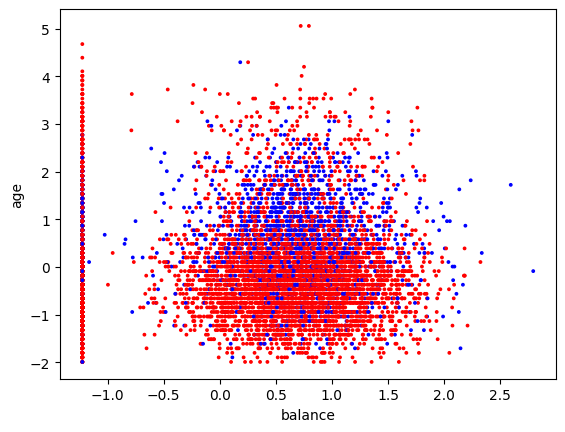

In [4]:
display(df.columns)
selected_features = ['credit_score', 'gender', 'age', 
       'balance',   'active_member',
        'country_Germany', 'country_Spain']

X_selected = df[selected_features]
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)


lm = LogisticRegression(class_weight={0:0.25, 1:0.75})
lm.fit(X_selected_scaled, y)


y_pred = lm.predict(X_selected_scaled)
display(y_pred)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

color = ['red' if y_ == 0 else 'blue' for y_ in y]


plt.scatter(X_selected_scaled[:, 3], X_selected_scaled[:, 2], c=color, s=3)
plt.xlabel('balance')
plt.ylabel('age')
plt.show()



c:\Users\emily\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

Text(0, 0.5, 'age')

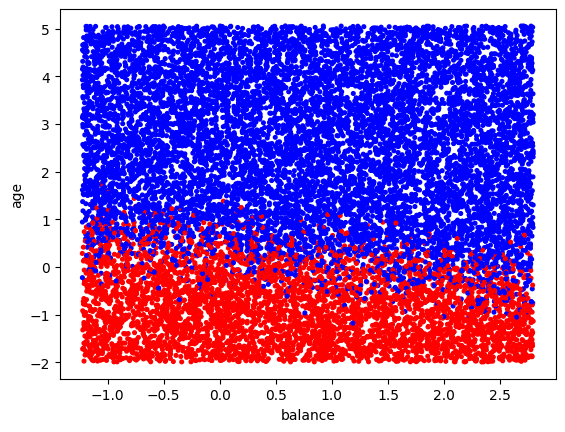

In [5]:
# Plot random points colored by predicted value
b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction
import random

n = 15000
new_label_lists = [ [random.uniform(X_selected_scaled[:, 0].min(),X_selected_scaled[:, 0].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 1].min(),X_selected_scaled[:, 1].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 2].min(),X_selected_scaled[:, 2].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 3].min(),X_selected_scaled[:, 3].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 4].min(),X_selected_scaled[:, 4].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 5].min(),X_selected_scaled[:, 5].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 6].min(),X_selected_scaled[:, 6].max())  for _ in range(n)]]
df_temp = pd.DataFrame({'credit_score':new_label_lists[0], 'gender':new_label_lists[1], 'age':new_label_lists[2], 
       'balance':new_label_lists[3],   'active_member':new_label_lists[4],
        'country_Germany':new_label_lists[5], 'country_Spain':new_label_lists[6]})
newlabel = lm.predict(df_temp)
display(newlabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]


plt.figure()
plt.scatter(new_label_lists[3], new_label_lists[2], c=color, marker='o', s=7)
plt.xlabel(selected_features[3])
plt.ylabel(selected_features[2])

-0.5558686899065852

array([-0.06813064, -0.2721849 ,  0.81204526,  0.18949948, -0.47536642,
        0.32924274,  0.01882   ])

Text(0, 0.5, 'age')

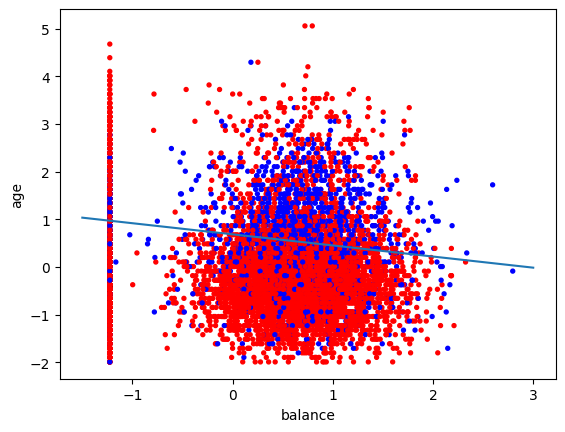

In [6]:
color = ['r' if y_ == 0 else 'b' for y_ in y]

b0 = lm.intercept_[0]
b = lm.coef_[0]
display(b0)
display(b)


plt.scatter(X_selected_scaled[:, 3], X_selected_scaled[:, 2], c=color, s=8)
Xdb = [-1.5, 3]
ydb = [-(b0+b[3]*x)/b[2] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('balance')
plt.ylabel('age')

### SVM

In [7]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
display(df.country.unique())
# create three dummy variables using get_dummies, then exclude the first dummy column
country_dummies = pd.get_dummies(df.country, prefix='country').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, country_dummies], axis=1)
df['gender'] = df.gender.map({'Female':0, 'Male':1})
df.head()

array(['France', 'Spain', 'Germany'], dtype=object)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [8]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(labels=['customer_id'])
display(numeric_columns)

correlation_matrix = df[numeric_columns].corr()

# # display the correlation of all features with 'Churn'
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
print(churn_correlation)

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
gender             -0.106512
active_member      -0.156128
Name: churn, dtype: float64


In [9]:
display(df.columns)
y = df.churn
selected_features = ['credit_score', 'gender', 'age', 
       'balance',   'active_member',
        'country_Germany', 'country_Spain']

X_selected = df[selected_features]
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'country_Germany', 'country_Spain'],
      dtype='object')

#### Linear

In [10]:
clf = SVC(kernel='linear', class_weight={0:0.23, 1:0.77})
clf.fit(X_selected_scaled, y)

y_pred = clf.predict(X_selected_scaled)
display(y_pred)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.4221219  0.89447746]'

'recall = [0.64261168 0.77495919]'

'f-score = [0.50953678 0.83044005]'

c:\Users\emily\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Text(0, 0.5, 'age')

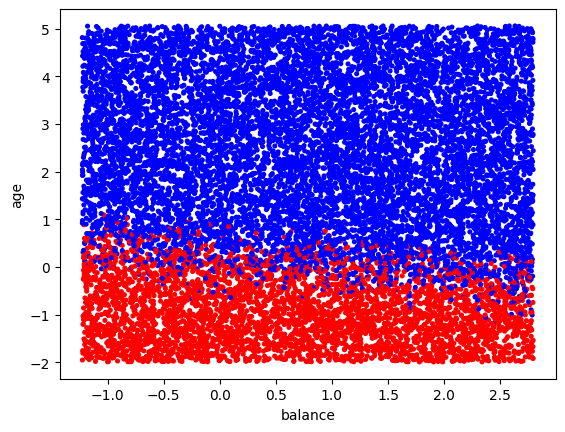

In [11]:
# Plot random points colored by predicted value
b0 = clf.intercept_
b = clf.coef_[0]

# Plot random points colored by prediction
import random

n = 15000
new_label_lists = [ [random.uniform(X_selected_scaled[:, 0].min(),X_selected_scaled[:, 0].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 1].min(),X_selected_scaled[:, 1].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 2].min(),X_selected_scaled[:, 2].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 3].min(),X_selected_scaled[:, 3].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 4].min(),X_selected_scaled[:, 4].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 5].min(),X_selected_scaled[:, 5].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 6].min(),X_selected_scaled[:, 6].max())  for _ in range(n)]]
df_temp = pd.DataFrame({'credit_score':new_label_lists[0], 'gender':new_label_lists[1], 'age':new_label_lists[2], 
       'balance':new_label_lists[3],   'active_member':new_label_lists[4],
        'country_Germany':new_label_lists[5], 'country_Spain':new_label_lists[6]})
newlabel = clf.predict(df_temp)
display(newlabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]

plt.figure()
plt.scatter(new_label_lists[3], new_label_lists[2], c=color, marker='o', s=7)
plt.xlabel(selected_features[3])
plt.ylabel(selected_features[2])

-0.4290090110786361

array([-0.05756951, -0.24535632,  0.85563524,  0.17610111, -0.36630036,
        0.30438907,  0.01134902])

Text(0, 0.5, 'age')

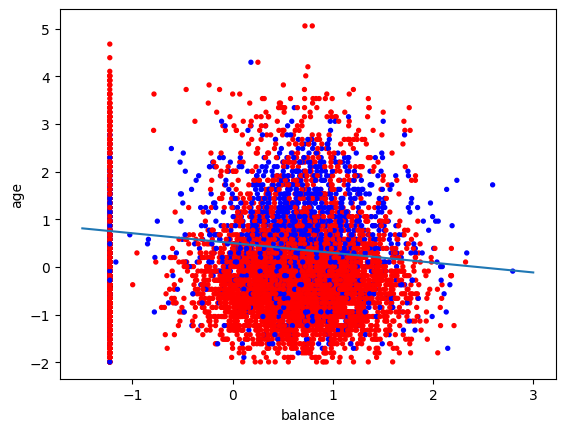

In [12]:
color = ['r' if y_ == 0 else 'b' for y_ in y]

b0 = clf.intercept_[0]
b = clf.coef_[0]
display(b0)
display(b)


plt.scatter(X_selected_scaled[:, 3], X_selected_scaled[:, 2], c=color, s=8)
Xdb = [-1.5, 3]
ydb = [-(b0+b[3]*x)/b[2] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('balance')
plt.ylabel('age')

#### Polynomial

In [13]:
clf = SVC(kernel='poly', degree=3, class_weight={0:0.2, 1:0.8})
clf.fit(X_selected_scaled, y)

y_pred = clf.predict(X_selected_scaled)
display(y_pred)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.42665855 0.90542151]'

'recall = [0.68826706 0.76340575]'

'f-score = [0.52677062 0.82837092]'

c:\Users\emily\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'age')

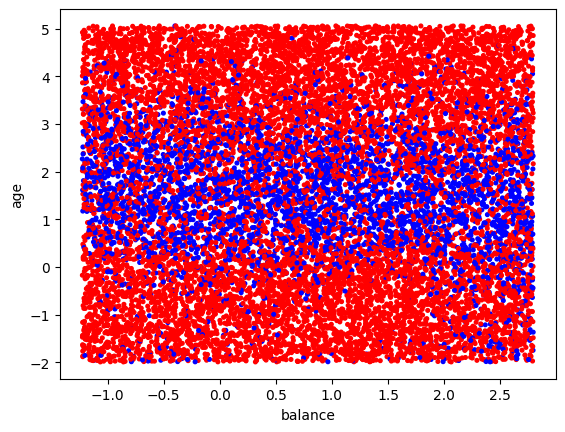

In [14]:
# Plot random points colored by prediction
import random

n = 15000
new_label_lists = [ [random.uniform(X_selected_scaled[:, 0].min(),X_selected_scaled[:, 0].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 1].min(),X_selected_scaled[:, 1].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 2].min(),X_selected_scaled[:, 2].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 3].min(),X_selected_scaled[:, 3].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 4].min(),X_selected_scaled[:, 4].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 5].min(),X_selected_scaled[:, 5].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 6].min(),X_selected_scaled[:, 6].max())  for _ in range(n)]]
df_temp = pd.DataFrame({'credit_score':new_label_lists[0], 'gender':new_label_lists[1], 'age':new_label_lists[2], 
       'balance':new_label_lists[3],   'active_member':new_label_lists[4],
        'country_Germany':new_label_lists[5], 'country_Spain':new_label_lists[6]})
newlabel = clf.predict(df_temp)
display(newlabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]

plt.figure()
plt.scatter(new_label_lists[3], new_label_lists[2], c=color, marker='o', s=7)
plt.xlabel(selected_features[3])
plt.ylabel(selected_features[2])

#### RBF

In [15]:
clf = SVC(kernel='rbf', class_weight={0:0.25, 1:0.75})
clf.fit(X_selected_scaled, y)

y_pred = clf.predict(X_selected_scaled)
display(y_pred)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.52071522 0.89061892]'

'recall = [0.58615611 0.86198669]'

'f-score = [0.55150115 0.87606892]'

c:\Users\emily\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'age')

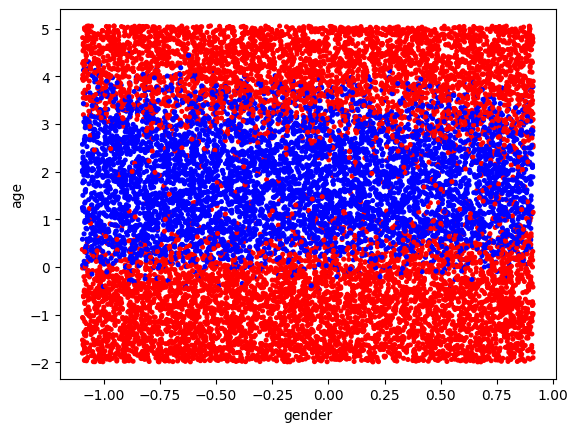

In [16]:
# Plot random points colored by prediction
import random

n = 15000
new_label_lists = [ [random.uniform(X_selected_scaled[:, 0].min(),X_selected_scaled[:, 0].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 1].min(),X_selected_scaled[:, 1].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 2].min(),X_selected_scaled[:, 2].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 3].min(),X_selected_scaled[:, 3].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 4].min(),X_selected_scaled[:, 4].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 5].min(),X_selected_scaled[:, 5].max())  for _ in range(n)],
                   [random.uniform(X_selected_scaled[:, 6].min(),X_selected_scaled[:, 6].max())  for _ in range(n)]]
df_temp = pd.DataFrame({'credit_score':new_label_lists[0], 'gender':new_label_lists[1], 'age':new_label_lists[2], 
       'balance':new_label_lists[3],   'active_member':new_label_lists[4],
        'country_Germany':new_label_lists[5], 'country_Spain':new_label_lists[6]})
newlabel = clf.predict(df_temp)
display(newlabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]

plt.figure()
plt.scatter(new_label_lists[1], new_label_lists[2], c=color, marker='o', s=7)
plt.xlabel(selected_features[1])
plt.ylabel(selected_features[2])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.25, random_state=42)

# train SVM with a linear kernel
svm_lin = SVC(kernel='linear', class_weight={0:0.25, 1:0.75})
svm_lin.fit(X_train, y_train)


# train SVM with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, class_weight={0:0.25, 1:0.75})
svm_poly.fit(X_train, y_train)

# Train SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', class_weight={0:0.25, 1:0.75})
svm_rbf.fit(X_train, y_train)

# Evaluate the models on the training set
print('Training set evaluation:')
print('Linear SVM:')
print(classification_report(y_train, svm_lin.predict(X_train)))
print('Polynomial SVM:')
print(classification_report(y_train, svm_poly.predict(X_train)))
print('RBF SVM:')
print(classification_report(y_train, svm_rbf.predict(X_train)))

# Evaluate the models on the testing set
print('Testing set evaluation:')
print('Linear SVM:')
print(classification_report(y_test, svm_lin.predict(X_test)))
print('Polynomial SVM:')
print(classification_report(y_test, svm_poly.predict(X_test)))
print('RBF SVM:')
print(classification_report(y_test, svm_rbf.predict(X_test)))

Training set evaluation:
Linear SVM:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5960
           1       0.44      0.60      0.50      1540

    accuracy                           0.76      7500
   macro avg       0.66      0.70      0.67      7500
weighted avg       0.79      0.76      0.77      7500

Polynomial SVM:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5960
           1       0.50      0.58      0.54      1540

    accuracy                           0.79      7500
   macro avg       0.69      0.72      0.70      7500
weighted avg       0.81      0.79      0.80      7500

RBF SVM:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5960
           1       0.52      0.59      0.55      1540

    accuracy                           0.80      7500
   macro avg       0.70      0.72      0.71      7500
weighted avg